#Proyecto 1 - Etapa 1: Inteligencia de Negocios

---
1. Sergio Oliveros
2. Camilo Daza
---

## 1.&nbsp; Entendimiento de datos

## 1.1.&nbsp; Carga de datos

Se utiliza Pandas para cargarlos en un DataFrame.

In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)

odsData = pd.read_excel("./ODScat_345.xlsx")

odsData

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5
4045,La participación de las mujeres en roles de li...,5
4046,"Según el WEF, según las tendencias de 2016, po...",5
4047,"Sirve como recurso y foro para las agencias, c...",5


A partir de ello podemos notar que este consta de 2 variables. La primera es "Textos_espanol" que contiene una fragmento de texto que habla acerca de un objetivo de desarrollo sostenible. Y la segunda es "sdg" ("Sustainable development goal") que representa el objetivo de desarrollo sostenible (la clase) a la que pertenece el fragmento de texto.

## 1.2.&nbsp; Dataset

In [2]:
odsData.dtypes

,0
Textos_espanol,object
sdg,int64


La forma en que se implementan las variables descritas anteriormente es: para "Textos_espanol" se utiliza un string que contiene los caracteres que componen al texto. Para "sgd" se utiliza un entero que representa la clase a la que pertence un fragmento de texto.

## 1.3.&nbsp; Estadísticas

Comenzando por el análisis de la variable "Textos_espanol". El principal análisis que se puede hacer es inspecionar la longitud de los datos.

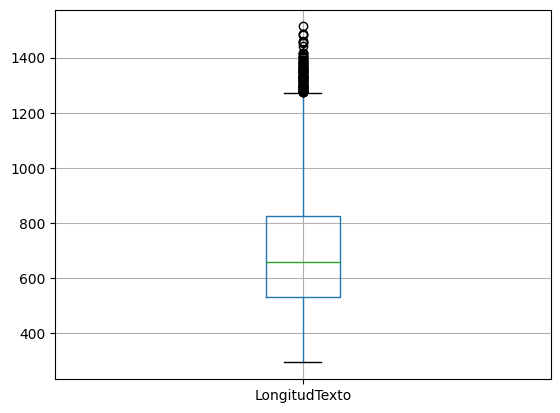

In [3]:
import matplotlib.pyplot as plt
odsData['LongitudTexto'] = odsData['Textos_espanol'].str.len()

odsData.boxplot(column='LongitudTexto')
plt.show()

Del grafico de cajas y bigotes podemos ver que la matoría de textos tiene una longitud de entre 500 caracteres y 800. Sin embargo, se presentan unos cuantos outliers superan los rangos normales. En específico:

In [4]:
odsDataTextLenStats = odsData['LongitudTexto'].describe()
odsDataTextLenStats

,LongitudTexto
count,4049.000000
mean,699.632502
std,228.988965
min,294.000000
25%,531.000000
50%,657.000000
75%,827.000000
max,1513.000000


In [5]:
q1 = odsDataTextLenStats["25%"]

q3 = odsDataTextLenStats["75%"]

range = (q3 - q1) *1.5

count_above_q3 = (odsData['LongitudTexto'] > q3 + range).sum()
print("Número de outliers por encima de umbral superior ",count_above_q3)

count_below_q1 = (odsData['LongitudTexto'] < q1 - range).sum()
print("Número de outliers por debajo de umbral inferior ", count_below_q1)

Número de outliers por encima de umbral superior  94
Número de outliers por debajo de umbral inferior  0


Son 93 los casos de textos que se podrían considerar como anormales. Sin embargo, dado que el enfoque prinicpal en el procesamiento del lengiaje natural es la semántica de los textos, no su rango de valores estos se van dejar como parte de dataset.  

Ahora, centrando la atención a la variable "sgd" se puede encontrar lo siguiente:

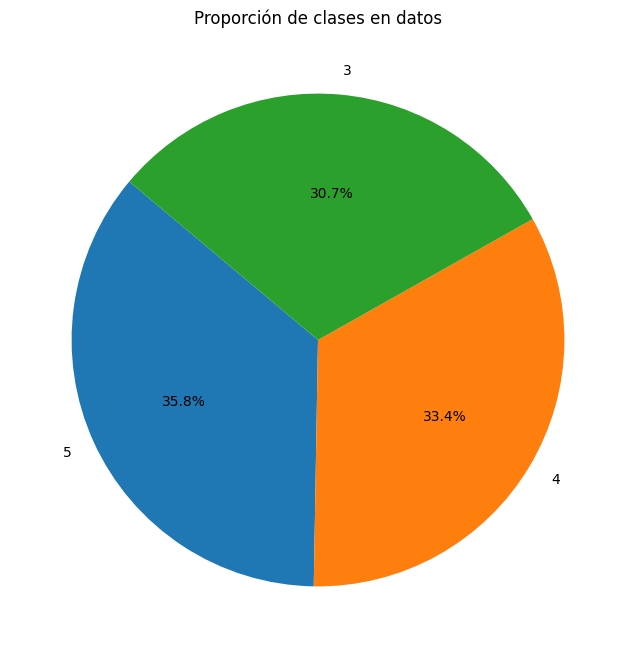

In [6]:
classCounts = odsData['sdg'].value_counts()
classPtgs = (classCounts / classCounts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(classPtgs, labels=classCounts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de clases en datos')
plt.show()

El resultado general es que se trata de un problema de clasificación
balanceado, de forma que no es necesario emplear técnicas para contrarrestar este problema a la hora de desarrollar el modelo.

## 1.4.&nbsp; Análisis de calidad de datos

**Análisis de Completitud**

In [7]:
odsData .isnull().sum()/odsData.shape[0]

,0
Textos_espanol,0.0
sdg,0.0
LongitudTexto,0.0


Al realizar el análisis de completitud se puede notar que no hay datos fatlantes. Es contamos con datos completos.

**Análisis de Unicidad**

In [8]:
odsData["Textos_espanol"].duplicated().sum() / odsData.shape[0]

0.0

Al analizar los textos del dataset nos podemos dar cuenta que ninguno de estos se encuentra duplicado. De forma que se puede afirmar que cada uno de los ejemplos de texto son únicos.

**Análisis de Consistencia**

Para el anáisis de consistencia sería necesario analizar cada uno de los textos para determinar si realmente está alineado con el objetivo de desarrollo sostenible al cual dice estar asociado (3 (Salud y Bienestar), 4 (Educación de Calidad) y 5 (Igualdad de Género)). Por efectos prácticos esto resulta inviable. Sin embargo, una manera rápida de analizar algunos de los datos es tomando muestras al azar y determinar si son consistentes:

In [9]:
sample = odsData.sample(1)
print("Objetivo de desarrollo sostenible:", sample["sdg"].item(),"\n")
sample["Textos_espanol"].item()

Objetivo de desarrollo sostenible: 4 



'Se desarrolló a finales de la década de 1960 en la enseñanza de la medicina para facilitar el aprendizaje de conceptos de ciencias básicas en el contexto de casos clínicos (recuadro 2). Hoy en día se utiliza en la mayoría de las facultades de medicina de Estados Unidos y en muchos otros países del mundo (Wood, 2008). Además, el ABP se ha adaptado con éxito a diversas disciplinas de la enseñanza superior, incluidas las ciencias naturales, las ciencias sociales o las humanidades. Escuelas de arquitectura, negocios, derecho, ingeniería, silvicultura, ciencias policiales, trabajo social, educación y muchos otros campos profesionales han adoptado el ABP (Ball y Pelco, 2006, Camp, 1996).'

De las muestras que se analizaron, estas fueron consistentes. No obstante, para afirmar que los datos son consistentes es necesario realizar un estudio con mayor precisión estadística.

**Análisis de Validez**

In [10]:
odsData["sdg"].value_counts()

,count
sdg,
5,1451
4,1354
3,1244


Como se vio anteriormente la variable _Textos\_espanol_ son strings. Por lo que podemso confirmar que estos son del tipo de datos esperado.

Para la variable _sdg_ después de inspeccionarla vemos que no contiene valores por fuera de lo esperado.

Por lo que es posible afirmar que los datos son válidos.

## **1.5**.&nbsp; Preparación de datos

### **1.5.1**.&nbsp; Caracteres erroneos

Para empezar, al inspeccionar los datos observamos lo siguiente:

In [11]:
odsData["Textos_espanol"][0]

'Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.'

En donde algunas entradas de la variable "Textos_espanol" contienen caracteres no propios del lenguaje español. De forma que se aplica un preprocesamiento para sustituir estos errores por los caracteres correspondientes. El resultado es el siguiente:

In [12]:

odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ã¡","á")
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ã©","é")
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ã³","ó")
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ãº","ú")
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ã±","ñ")
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace("Ã","í")

odsData["Textos_espanol"][0]

'Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.'

Como se puede ver, los caracteres no pertenencientes al español han sido sustituidos por los necesarios para hacer que las frases sigan teniendo sentido.

### **1.5.2**.&nbsp; Palabras vacías

Por otro lado, dentro de los textos que tenemos una gran cantidad de las palabras dentro de ellos son palabras vacías, que para los modelos que se espera desarrollar no tienen mucha importancia, por lo que es necesario removerlas del conjunto de datos que se tiene.


In [13]:
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.lower()

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
spanish_stopwords = set(stopwords.words('spanish'))
spanish_stopwords.add("ello")
spanish_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ello',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 '

In [15]:
regexStopWords = r'\b(' + '|'.join(spanish_stopwords) + r')\b'

odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace(regexStopWords, "", regex=True) #Eliminación palabras vacias
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace(r'[^\w\s]', '', regex=True) #Eliminación puntación
odsData["Textos_espanol"] = odsData["Textos_espanol"].str.replace(r'\d+|_', '', regex=True) #Eliminación números
odsData["Textos_espanol"]

,Textos_espanol
0,ejemplo número consultas externas especial...
1,gobierno central financió directamente solo...
2,claramente factores juego particular var...
3,ejemplo australiano victoria creó agencia...
4,consumo anual alcohol estima litros año ...
...,...
4044,identificará cuestiones género destacadas...
4045,participación mujeres roles liderazgo den...
4046,según wef según tendencias podría cerrarse...
4047,sirve recurso foro agencias objetivo lo...


### **1.5.3**.&nbsp; Stemming

In [16]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("spanish")

odsData["Stems"] = odsData["Textos_espanol"].apply(lambda text : [stemmer.stem(token) for token in word_tokenize(text)])
odsData["Stems"]

,Stems
0,"[ejempl, numer, consult, extern, especial, cad..."
1,"[gobiern, central, financ, direct, sol, gast, ..."
2,"[clar, factor, jueg, particul, varied, barrer,..."
3,"[ejempl, australian, victori, cre, agenci, pro..."
4,"[consum, anual, alcohol, estim, litr, año, hom..."
...,...
4044,"[identific, cuestion, gener, destac, malt, asi..."
4045,"[particip, mujer, rol, liderazg, dentr, legisl..."
4046,"[segun, wef, segun, tendenci, podr, cerr, dent..."
4047,"[sirv, recurs, for, agenci, objet, logr, enfoq..."


### **1.5.4**.&nbsp; TF-IDF (Term Frequency - Inverse Document Frequency)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(min_df=0.017)
tfidfDocumentsMat = tfidfVectorizer.fit_transform(odsData["Stems"].astype(str)).toarray()
tfidfDocuments = pd.DataFrame(tfidfDocumentsMat, columns=tfidfVectorizer.get_feature_names_out())
tfidfDocuments.to_excel("DatosPreprocesados.xlsx")
tfidfDocuments

,abord,academ,acced,acces,accion,acept,actitud,activ,actual,acuerd,adapt,adecu,ademas,adicional,administr,adopt,adult,afect,agenci,ahor,alcanc,alcanz,alcohol,alrededor,alta,altas,alto,altos,alumn,ambit,ampli,analisis,analiz,anterior,anual,aplic,apoy,aprend,aprendizaj,aproxim,aquell,are,articul,asegur,asesor,asi,asign,asistent,asoci,aspect,atencion,aul,aument,aun,aunqu,australi,autonom,autor,avanc,avanz,ayud,año,años,baj,barrer,bas,basic,benefici,bien,bienest,brech,brind,buen,busc,cab,cad,calid,calif,cambi,cantid,capac,capacit,capitul,caracterist,carg,carrer,cas,casi,caus,centr,central,cienci,cient,ciert,cinc,civil,clar,clas,clav,clinic,cobertur,colabor,com,combin,compar,compart,competent,complej,complet,comport,comprend,compromis,comun,comunitari,condicion,conjunt,conoc,consecuent,consej,consider,constitu,consult,consum,conten,context,continu,contrari,contrat,contribu,control,coordin,cost,cre,creacion,crecient,crecimient,cronic,cualqui,cuant,cuatr,cuent,cuestion,cuid,cultur,cultural,cumpl,curs,dad,dar,dat,deb,debaj,dec,decision,dedic,defin,demand,demostr,dentr,depend,derech,desafi,desarroll,describ,desempeñ,desfavorec,desiguald,desigualdad,despues,destac,destin,detall,determin,diagnost,dich,diferent,dificil,direct,director,dirig,discrimin,diseñ,disminu,dispon,disposicion,distint,distribu,divers,docent,document,domest,dos,econom,edad,educ,efect,eficaci,eficaz,eficient,ejempl,elabor,eleccion,elev,elimin,embarg,emergent,emple,empoder,empres,empresari,empresarial,encontr,encuentr,encuest,enfermed,enfermedad,enfoqu,enfrent,enseñ,entorn,equid,equip,equit,escol,escolar,escuel,esfuerz,especial,especializ,especif,esper,establec,estadist,estandar,estatus,estim,estrategi,estructur,estudi,et,evalu,evident,evit,examin,exig,exist,existent,exit,experient,experiment,explic,facilit,factor,falt,famili,familiar,femenin,figur,fin,final,financ,financi,financier,fisic,foment,fond,form,formacion,formal,formul,fortalec,frent,fuent,fuert,fuerz,funcion,fundamental,futur,garantiz,gast,gener,general,gestion,global,gobi,gobiern,grad,gran,grand,grup,gubernamental,hab,habil,hac,haci,hech,herramient,hij,hog,hogar,hombr,hor,hospital,hospitalari,human,identific,igual,iguald,impact,implement,implic,import,impuls,incent,inclu,inclus,incorpor,independient,indic,individual,infantil,inferior,influ,inform,infraestructur,ingres,inici,inicial,inmigr,innov,institu,institucional,integr,integral,interes,internacional,intervencion,introduc,inversion,investig,involucr,joven,junt,laboral,larg,legal,legisl,ley,libr,lider,liderazg,limit,lleg,llev,local,logr,lueg,lug,madr,maestr,maner,manten,marc,masculin,matemat,materi,matern,matricul,matrimoni,mayor,mecan,med,medi,mediant,medic,medicament,mejor,men,menor,mental,menud,merc,mexic,miembr,mientr,millon,ministeri,mism,mit,mod,model,mortal,motiv,much,muert,muestr,muj,mujer,mund,mundial,municipi,nacion,nacional,neces,necesari,necesit,negat,negoci,ningun,nivel,niñ,norm,nuev,numer,objet,oblig,obligatori,observ,obten,ocde,ocup,ofert,ofrec,opcion,oportun,organ,organiz,orient,pacient,padr,pag,pais,papel,parec,part,particip,particul,particular,pas,pedagog,pequeñ,period,permit,person,personal,perspect,pes,pis,plan,planif,plaz,plen,poblacion,pobr,pobrez,poc,pod,podr,polit,pon,porcentaj,posibl,posit,potencial,practic,preocup,prepar,present,prest,prestacion,presupuest,prevencion,prim,primari,primer,principal,principi,priv,probabil,probabl,problem,proced,proces,produc,product,profesion,profesional,profesor,program,progres,promedi,promocion,promov,propi,propied,proporcion,proteccion,proveedor,provision,proyect,prueb,public,pued,puest,punt,razon,realiz,recib,recient,recomend,reconoc,recopil,recurs,red,reduc,reduccion,reflej,reform,reforz,region,regional,registr,regul,rein,relacion,relat,relev,remuner,rendimient,represent,republ,requier,requisit,respect,respond,respons,respuest,result,revision,ric,riesg,rol,rural,salari,salarial,salud,sanitari,seccion,sector,secundari,segu,seguimient,segun,segund,segur,seleccion,ser,seri,servici,sex,sexual,señal

### **1.5.5**.&nbsp; Split de los datos

In [18]:
from sklearn.model_selection import train_test_split

xTrain, xVal, yTrain, yVal = train_test_split(tfidfDocumentsMat, odsData["sdg"], test_size=0.2, random_state=42, stratify=odsData["sdg"])

## **2.**&nbsp; Modelado y Evaluación:

## **2.1.**&nbsp; Ranfom Forest (Camilo Daza)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [750, 1250], 'criterion': ["gini", "entropy", "log_loss"], "max_depth":[20, 50,None]}

rfc = RandomForestClassifier(random_state = 42)

gridSearchRf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, scoring = "f1_macro", verbose=3)

gridSearchRf.fit(xTrain, yTrain)


Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END criterion=gini, max_depth=20, n_estimators=750;, score=0.954 total time=   4.8s
[CV 2/2] END criterion=gini, max_depth=20, n_estimators=750;, score=0.953 total time=   5.9s
[CV 1/2] END criterion=gini, max_depth=20, n_estimators=1250;, score=0.953 total time=   7.8s
[CV 2/2] END criterion=gini, max_depth=20, n_estimators=1250;, score=0.954 total time=   8.9s
[CV 1/2] END criterion=gini, max_depth=50, n_estimators=750;, score=0.957 total time=   5.0s
[CV 2/2] END criterion=gini, max_depth=50, n_estimators=750;, score=0.957 total time=   6.1s
[CV 1/2] END criterion=gini, max_depth=50, n_estimators=1250;, score=0.956 total time=   8.3s
[CV 2/2] END criterion=gini, max_depth=50, n_estimators=1250;, score=0.956 total time=   9.0s
[CV 1/2] END criterion=gini, max_depth=None, n_estimators=750;, score=0.956 total time=   5.6s
[CV 2/2] END criterion=gini, max_depth=None, n_estimators=750;, score=0.958 total time=   5.2s
[

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 50, None],
                         'n_estimators': [750, 1250]},
             scoring='f1_macro', verbose=3)

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 1250}
              precision    recall  f1-score   support

           3       0.96      0.96      0.96       249
           4       0.98      0.96      0.97       271
           5       0.95      0.97      0.96       290

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



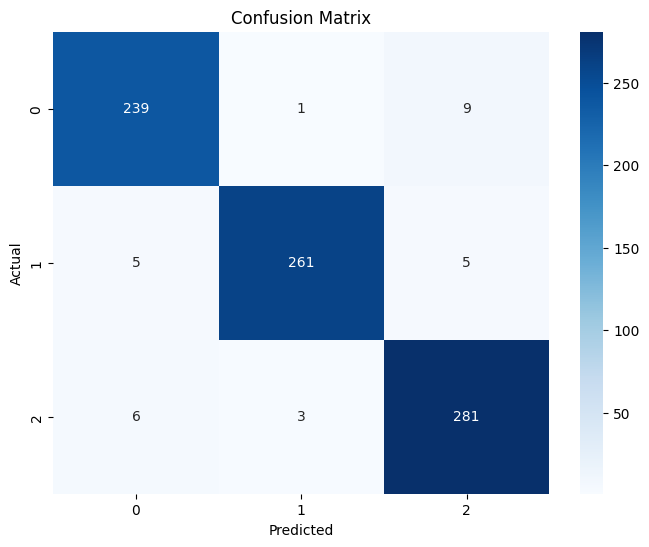

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

bestRF = RandomForestClassifier(random_state = 42, **gridSearchRf.best_params_)
print(gridSearchRf.best_params_)
bestRF.fit(xTrain, yTrain)
predRf = bestRF.predict(xVal)
print(classification_report(yVal,predRf))

cm1 = confusion_matrix(yVal, predRf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **2.2.**&nbsp; Support Vector Machine (Sergio Oliveros)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [2, 3, 4], 'kernel': ["poly", "rbf", "sigmoid"], "gamma":["scale", "auto", 0.1, 10], "decision_function_shape" :["ovo", "ovr"],}

svc = SVC()

gridSearchSVM = GridSearchCV(estimator=svc, param_grid=param_grid, scoring = "f1_macro", cv=2, verbose=3)

gridSearchSVM.fit(xTrain, yTrain)


Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=poly;, score=0.970 total time=   1.5s
[CV 2/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=poly;, score=0.960 total time=   1.8s
[CV 1/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.969 total time=   2.5s
[CV 2/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.968 total time=   2.1s
[CV 1/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.958 total time=   0.4s
[CV 2/2] END C=2, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.958 total time=   0.4s
[CV 1/2] END C=2, decision_function_shape=ovo, gamma=auto, kernel=poly;, score=0.176 total time=   1.3s
[CV 2/2] END C=2, decision_function_shape=ovo, gamma=auto, kernel=poly;, score=0.176 total time=   1.4s
[CV 1/2] END C=2, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.176 total time= 

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [2, 3, 4],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto', 0.1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1_macro', verbose=3)

{'C': 3, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           3       0.96      0.96      0.96       249
           4       0.97      0.99      0.98       271
           5       0.96      0.95      0.96       290

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



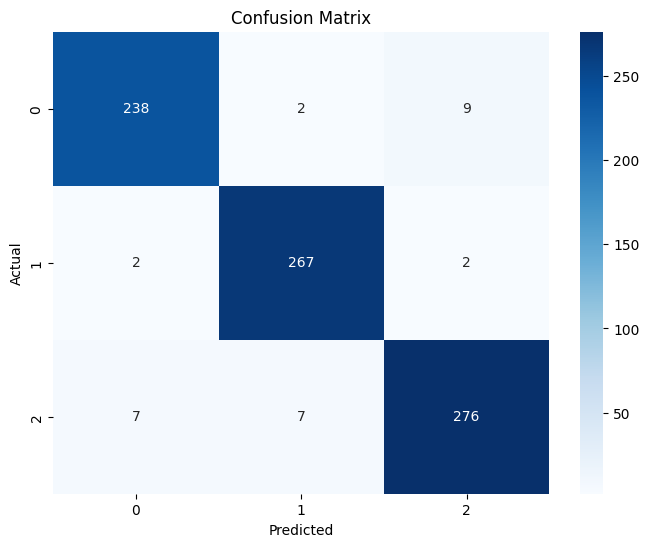

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

bestSVM = SVC(**gridSearchSVM.best_params_)
print(gridSearchSVM.best_params_)
bestSVM.fit(xTrain, yTrain)
predSVM = bestSVM.predict(xVal,)


print(classification_report(yVal, predSVM))
cm2 = confusion_matrix(yVal, predSVM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **2.3.**&nbsp; Multi-Layer Perceptron (Sergio Oliveros)

In [23]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', solver='adam', random_state=42)

param_grid = {'hidden_layer_sizes': [(512, 256, 128, 64, 32), (512, 256, 128, 64, 32, 16), (512, 128, 32, 16), (256, 64, 32, 16), (512, 128, 32), (256, 64, 16)], 'activation': ["logistic", "tanh", "relu"], "learning_rate":["constant", "adaptive"], }

mlp = MLPClassifier(solver='adam', random_state=42, early_stopping = True)

gridSearchMLP = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring = "f1_macro", cv=2, verbose=3)

gridSearchMLP.fit(xTrain, yTrain)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32), learning_rate=constant;, score=0.176 total time=   3.2s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32), learning_rate=constant;, score=0.176 total time=   3.1s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32), learning_rate=adaptive;, score=0.176 total time=   4.4s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32), learning_rate=adaptive;, score=0.176 total time=   3.8s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32, 16), learning_rate=constant;, score=0.176 total time=   4.9s
[CV 2/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32, 16), learning_rate=constant;, score=0.176 total time=   3.4s
[CV 1/2] END activation=logistic, hidden_layer_sizes=(512, 256, 128, 64, 32, 16), learning_rate=adaptive;, score=0.176 total ti

GridSearchCV(cv=2,
             estimator=MLPClassifier(early_stopping=True, random_state=42),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(512, 256, 128, 64, 32),
                                                (512, 256, 128, 64, 32, 16),
                                                (512, 128, 32, 16),
                                                (256, 64, 32, 16),
                                                (512, 128, 32), (256, 64, 16)],
                         'learning_rate': ['constant', 'adaptive']},
             scoring='f1_macro', verbose=3)

{'activation': 'relu', 'hidden_layer_sizes': (512, 256, 128, 64, 32, 16), 'learning_rate': 'constant'}
              precision    recall  f1-score   support

           3       0.96      0.95      0.96       249
           4       0.97      0.97      0.97       271
           5       0.96      0.96      0.96       290

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



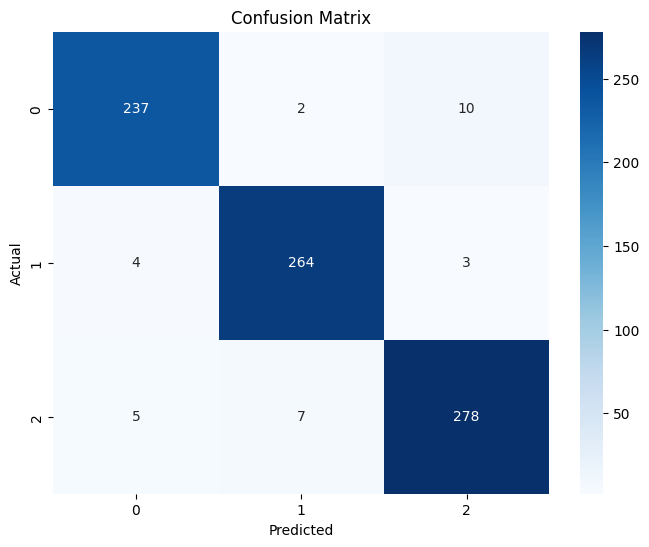

In [24]:
bestMLP = MLPClassifier(solver='adam', random_state = 42, early_stopping = True, **gridSearchMLP.best_params_)
print(gridSearchMLP.best_params_)
bestMLP.fit(xTrain, yTrain)

predMLP = bestMLP.predict(xVal)

print(classification_report(yVal,predMLP))
cm3 = confusion_matrix(yVal, predMLP)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **3.**&nbsp; Resultados

## **3.1.**&nbsp; Palabras más importantes

In [25]:
import numpy as np
ods3 = xVal[predSVM == 3]
ods4 = xVal[predSVM == 4]
ods5 = xVal[predSVM == 5]

ods3Sum = ods3.sum(axis=0)
ods3Indices = np.argsort(ods3Sum)[::-1]
print("Palabras más importantes ods3:",tfidfVectorizer.get_feature_names_out()[ods3Indices[:10]])

ods4Sum = ods4.sum(axis=0)
ods4Indices = np.argsort(ods4Sum)[::-1]
print("Palabras más importantes ods4:",tfidfVectorizer.get_feature_names_out()[ods4Indices[:10]])

ods5Sum = ods5.sum(axis=0)
ods5Indices = np.argsort(ods5Sum)[::-1]
print("Palabras más importantes ods5:",tfidfVectorizer.get_feature_names_out()[ods5Indices[:10]])

Palabras más importantes ods3: ['salud' 'atencion' 'servici' 'medic' 'mental' 'sanitari' 'pacient'
 'sistem' 'calid' 'enfermedad']
Palabras más importantes ods4: ['educ' 'estudi' 'escuel' 'docent' 'aprendizaj' 'evalu' 'program' 'alumn'
 'enseñ' 'sistem']
Palabras más importantes ods5: ['mujer' 'gener' 'derech' 'hombr' 'trabaj' 'iguald' 'pued' 'polit' 'pais'
 'niñ']


## **3.2.**&nbsp; Predicción datos de prueba

In [27]:
odsTest = pd.read_excel("./TestODScat_345.xlsx")

odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ã¡","á")
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ã©","é")
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ã³","ó")
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ãº","ú")
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ã±","ñ")
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace("Ã","í")
originalText = odsTest["Textos_espanol"]

odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace(regexStopWords, "", regex=True) #Eliminación palabras vacias
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace(r'[^\w\s]', '', regex=True) #Eliminación puntación
odsTest["Textos_espanol"] = odsTest["Textos_espanol"].str.replace(r'\d+|_', '', regex=True) #Eliminación números

odsTest["Stems"] = odsTest["Textos_espanol"].apply(lambda text : [stemmer.stem(token) for token in word_tokenize(text)])
tfidfDocumentsTestMat = tfidfVectorizer.transform(odsTest["Stems"].astype(str)).toarray()

testPredsRF = bestRF.predict(tfidfDocumentsTestMat)

odsTest["sdg"] = testPredsRF
odsTest["Textos_espanol"]=originalText

odsTest[["Textos_espanol", "sdg"]].to_excel('rfTestPredictions.xlsx', index=False)